In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import glob
import pickle

## the image calibration
what's the purpose of the image calibration? 
the undistorted image has no obvious diffenence from the original image? so what the goal of the camera calibration?


In [4]:
images = glob.glob("./camera_cal/calibration*.jpg")

In [54]:
# prepare object points
nx = 9
ny = 6

objpoints = []
imgpoints = []

objp = np.zeros((ny*nx, 3), np.float32)
objp[:,0:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Make a list of calibration images
for fname in images:
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

pickle.dump(objpoints, open("./objpoints", "wb"))
pickle.dump(imgpoints, open("./imgpoints", "wb"))

In [55]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

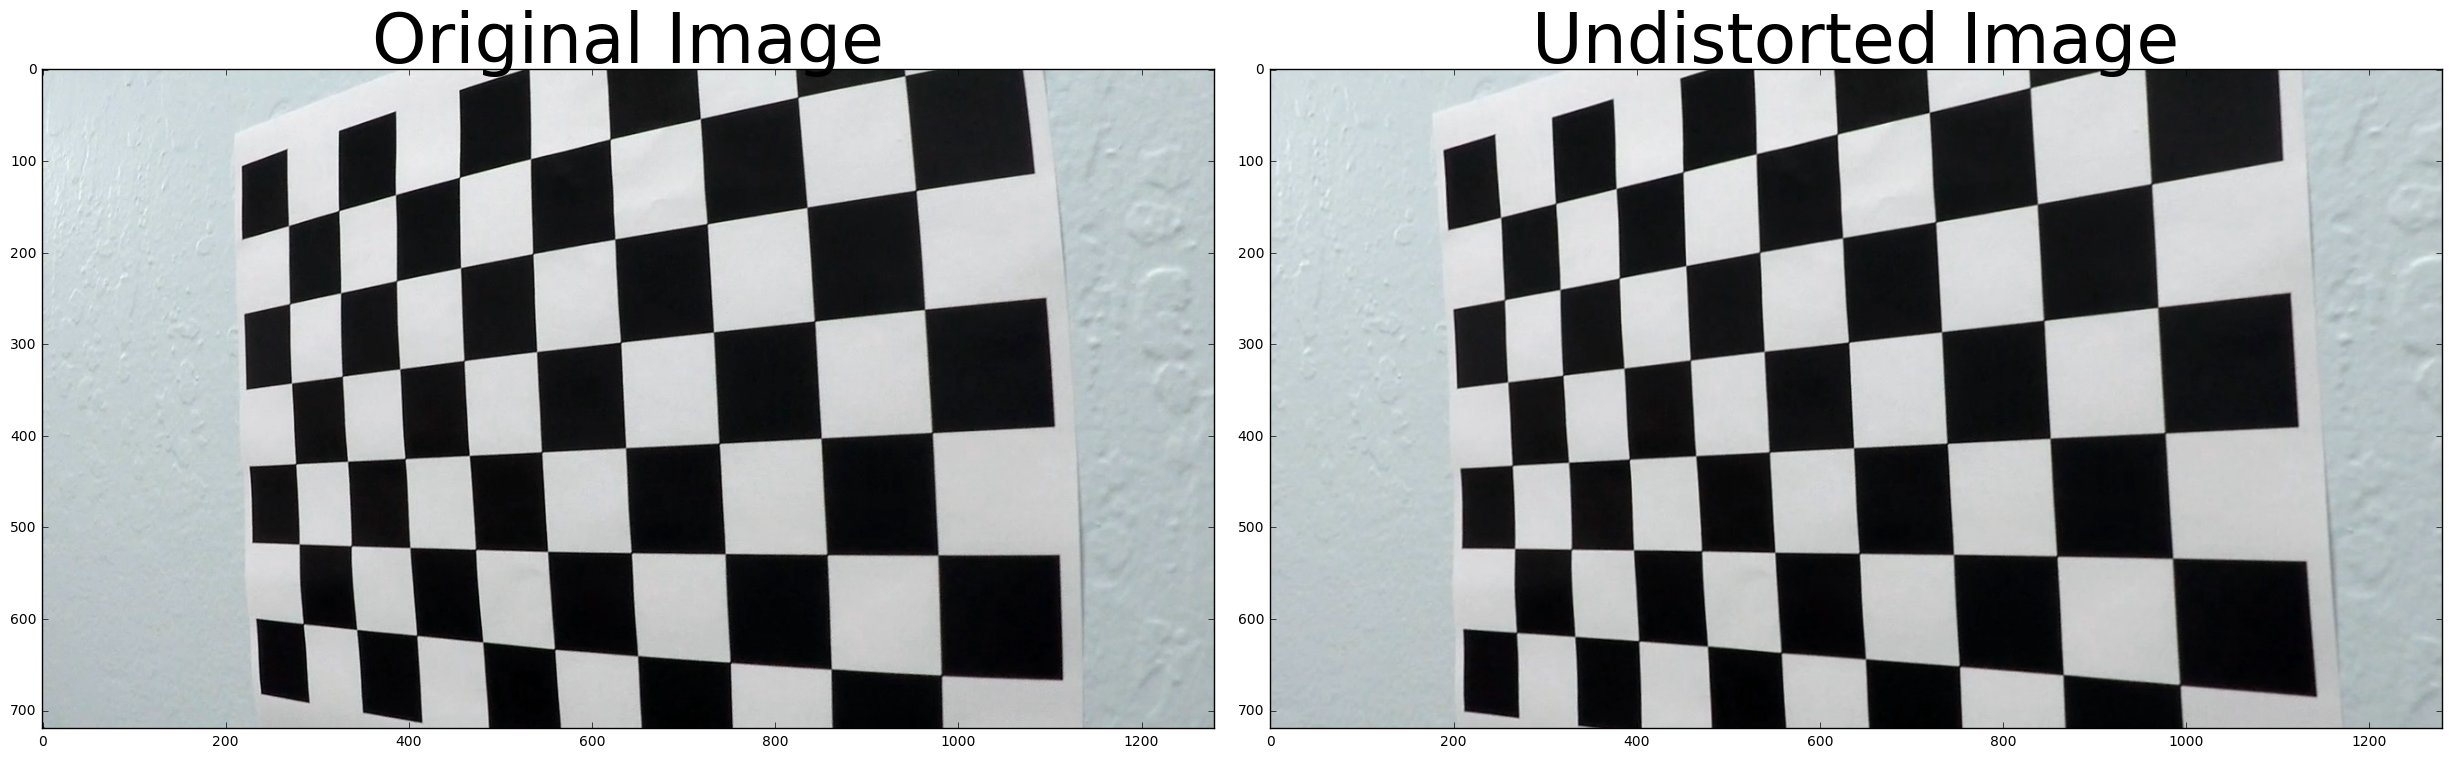

In [56]:
test_img = cv2.imread("./camera_cal/calibration4.jpg")
undistorted = cv2.undistort(test_img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## the perspective transformation 

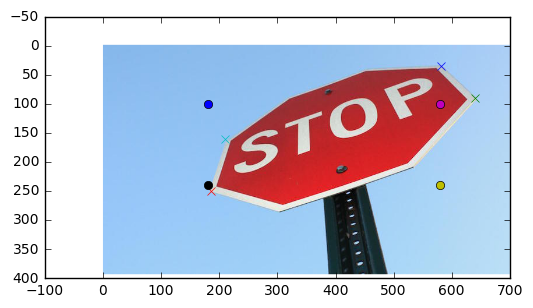

In [24]:
test_image = plt.imread("./stop_sign.jpeg")
plt.imshow(test_image)

# the source rectangle
plt.plot(582, 35, "x")
plt.plot(640, 90, "x")
plt.plot(185, 250, "x")
plt.plot(210, 160, "x")

# the destination rectangle
plt.plot(580, 100, "o")
plt.plot(580, 240, "o")
plt.plot(180, 240, "o")
plt.plot(180, 100, "o")

In [26]:
def warp(img):
    
    image_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
        [[582, 35],
         [640, 90],
         [185, 250],
         [210, 160]
        ])
    
    dst = np.float32(
        [[580, 100],
         [580, 240],
         [180, 240],
         [180, 100]   
        ])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, image_size, flags=cv2.INTER_LINEAR)
    
    return warped

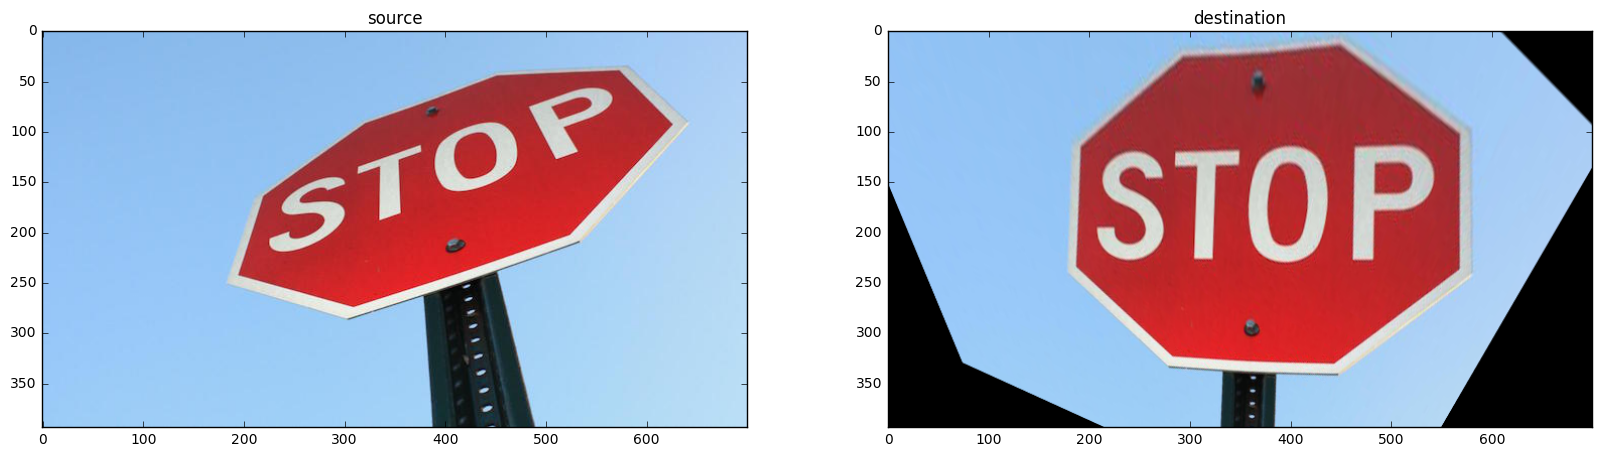

In [27]:
warped_image = warp(test_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title("source")
ax1.imshow(test_image)
ax2.set_title("destination")
ax2.imshow(warped_image)

## undistort and perspective transformation

True


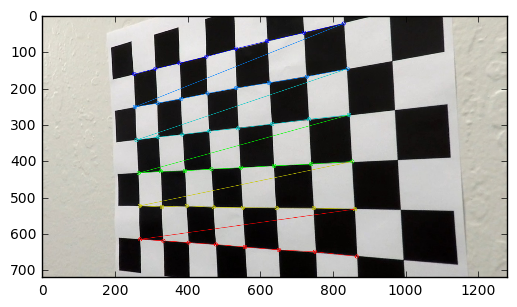

In [94]:
# img = plt.imread("./camera_cal/calibration14.jpg")
# undistort = cv2.undistort(img, mtx, dist)
img = plt.imread("./camera_cal/calibration4.jpg")
undistort = cv2.undistort(img, mtx, dist)
nx = 8
ny = 6
gray = cv2.cvtColor(undistort, cv2.COLOR_RGB2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
print(ret)
cv2.drawChessboardCorners(undistort, (nx, ny), corners, ret)
plt.imshow(undistort)

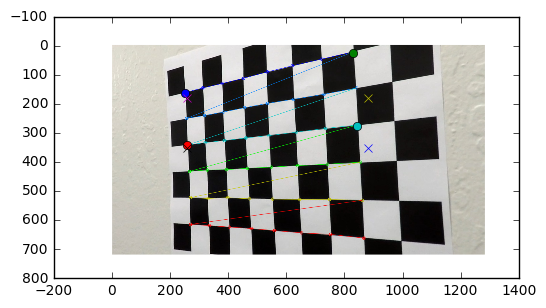

In [96]:
# corners.shape
plt.imshow(undistort)
plt.plot(corners[0][0][0], corners[0][0][1], "o")
plt.plot(corners[7][0][0], corners[7][0][1], "o")
plt.plot(corners[16][0][0], corners[16][0][1], "o")
plt.plot(corners[23][0][0], corners[23][0][1], "o")

plt.plot(260,180,"x")
plt.plot(880,180,"x")
plt.plot(260,350,"x")
plt.plot(880,350,"x")

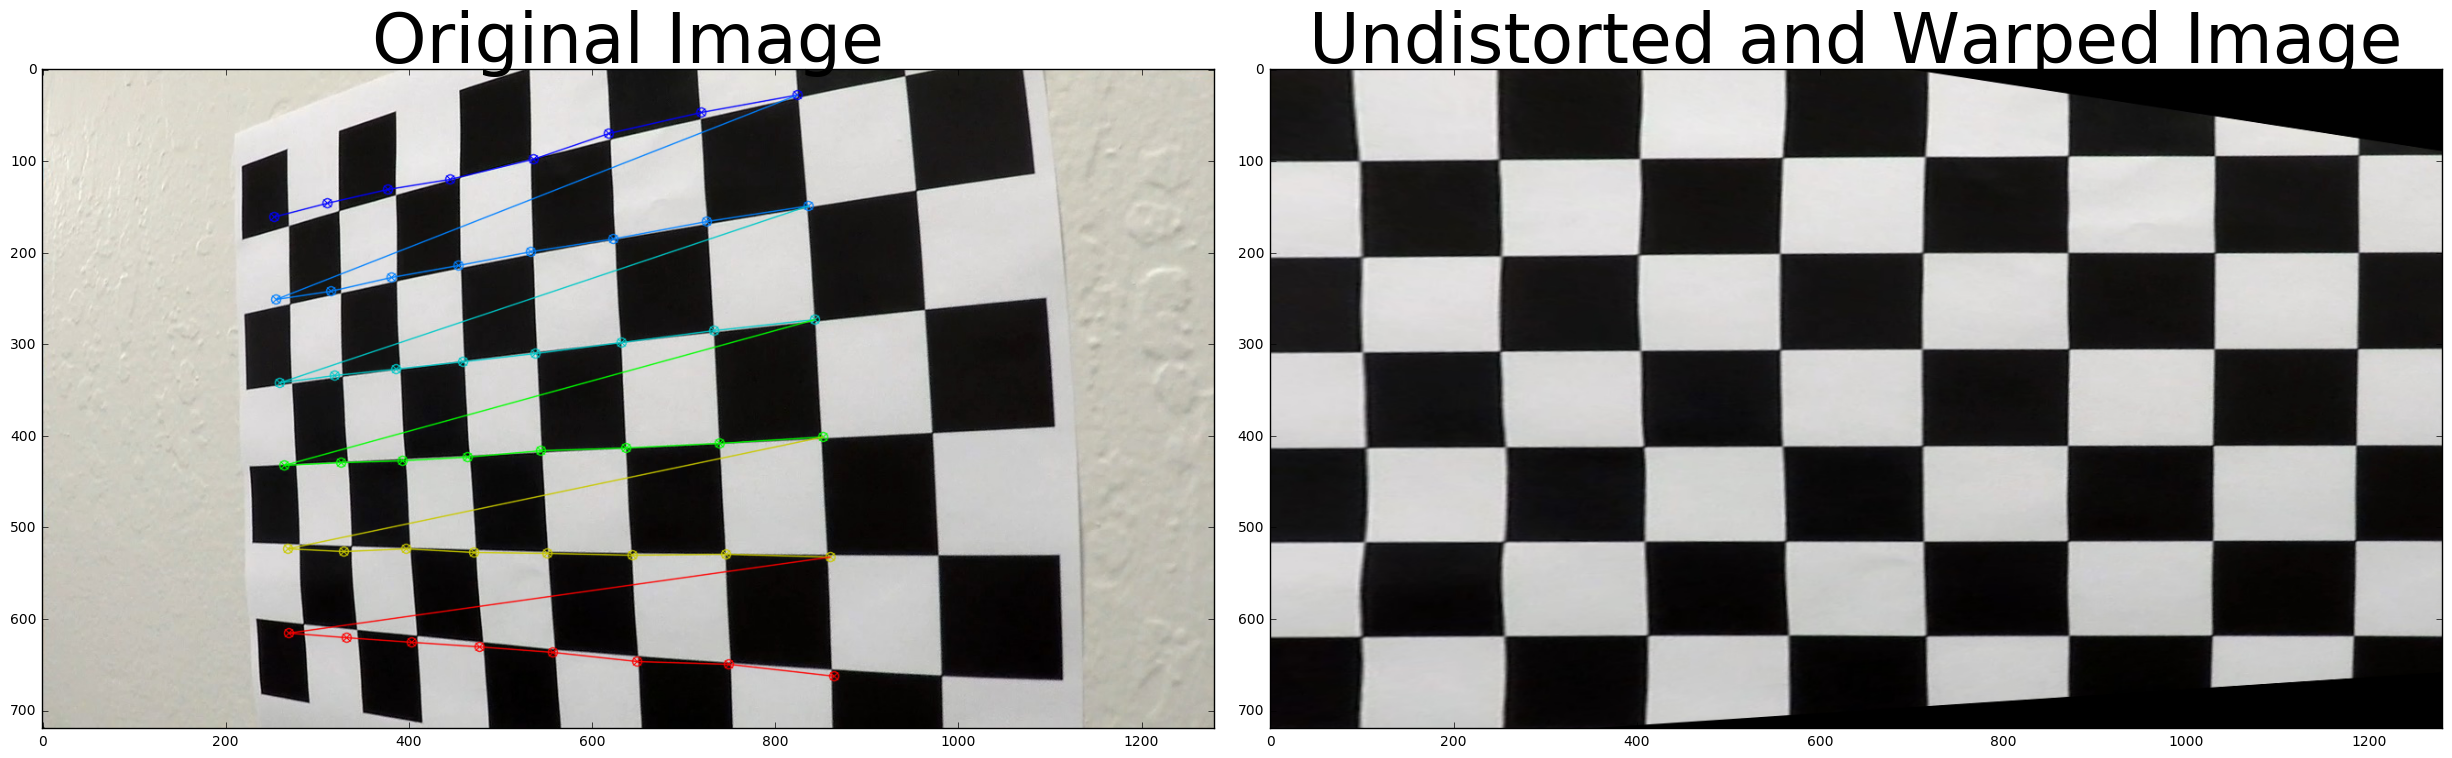

In [97]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistort = cv2.undistort(img, mtx, dist)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undistorted, cv2.COLOR_RGB2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # 4) If corners found: 
    if ret:
        # a) draw corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

        #### ---------------------------------
        ### by me:
#         # b) define 4 source points 
#         src = np.float32([
#                 [corners[0][0][0], corners[0][0][1]],
#                 [corners[7][0][0], corners[7][0][1]],
#                 [corners[16][0][0], corners[16][0][1]],
#                 [corners[23][0][0], corners[23][0][1]]
#             ])
#              #Note: you could pick any four of the detected corners 
#              # as long as those four corners define a rectangle
#              # One especially smart way to do this would be to use four well-chosen
#              # corners that were automatically detected during the undistortion steps
#              #We recommend using the automatic detection of corners in your code
#         # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])        
#         dst = np.float32([
#                 [260,180],
#                 [880,180],
#                 [260,350],
#                 [880,350]
#             ])

        #### ---------------------------------
        ### given by the solution
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        #### ---------------------------------
 
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        image_size = (undistort.shape[1], undistort.shape[0])
        warped = cv2.warpPerspective(undistort, M, image_size, flags=cv2.INTER_LINEAR)
#     #delete the next two lines
#     M = None
#     warped = np.copy(img) 
    return warped, M
#     return None, None
img = plt.imread("./camera_cal/calibration4.jpg")
nx = 8
ny = 6

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## sobel operator

In [103]:
def display2images(left_img, right_img, left_title="Original", right_title="Processed", left_gray=False, right_gray=False):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    if left_gray:
        ax1.imshow(left_img, cmap="gray")
    else:
        ax1.imshow(left_img)
    ax1.set_title(left_title, fontsize=50)
    if right_gray:
        ax2.imshow(right_img, cmap="gray")
    else:
        ax2.imshow(right_img)
    ax2.set_title(right_title, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [113]:
def abs_sobel_thresh(img, orient='x', thresh_min=20, thresh_max=100):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply cv2.Sobel()
    if orient == "x":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.absolute(sobel)
    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))    
    # Apply lower and upper thresholds
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # Create binary_output
    return binary_output

# def sobel(img):
    
    
#     sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    
#     abs_sobelx = np.absolute(sobelx)
#     scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

#     thresh_min = 20
#     thresh_max = 100
    
#     return sxbinary
# #     plt.imshow(sxbinary, cmap='gray')

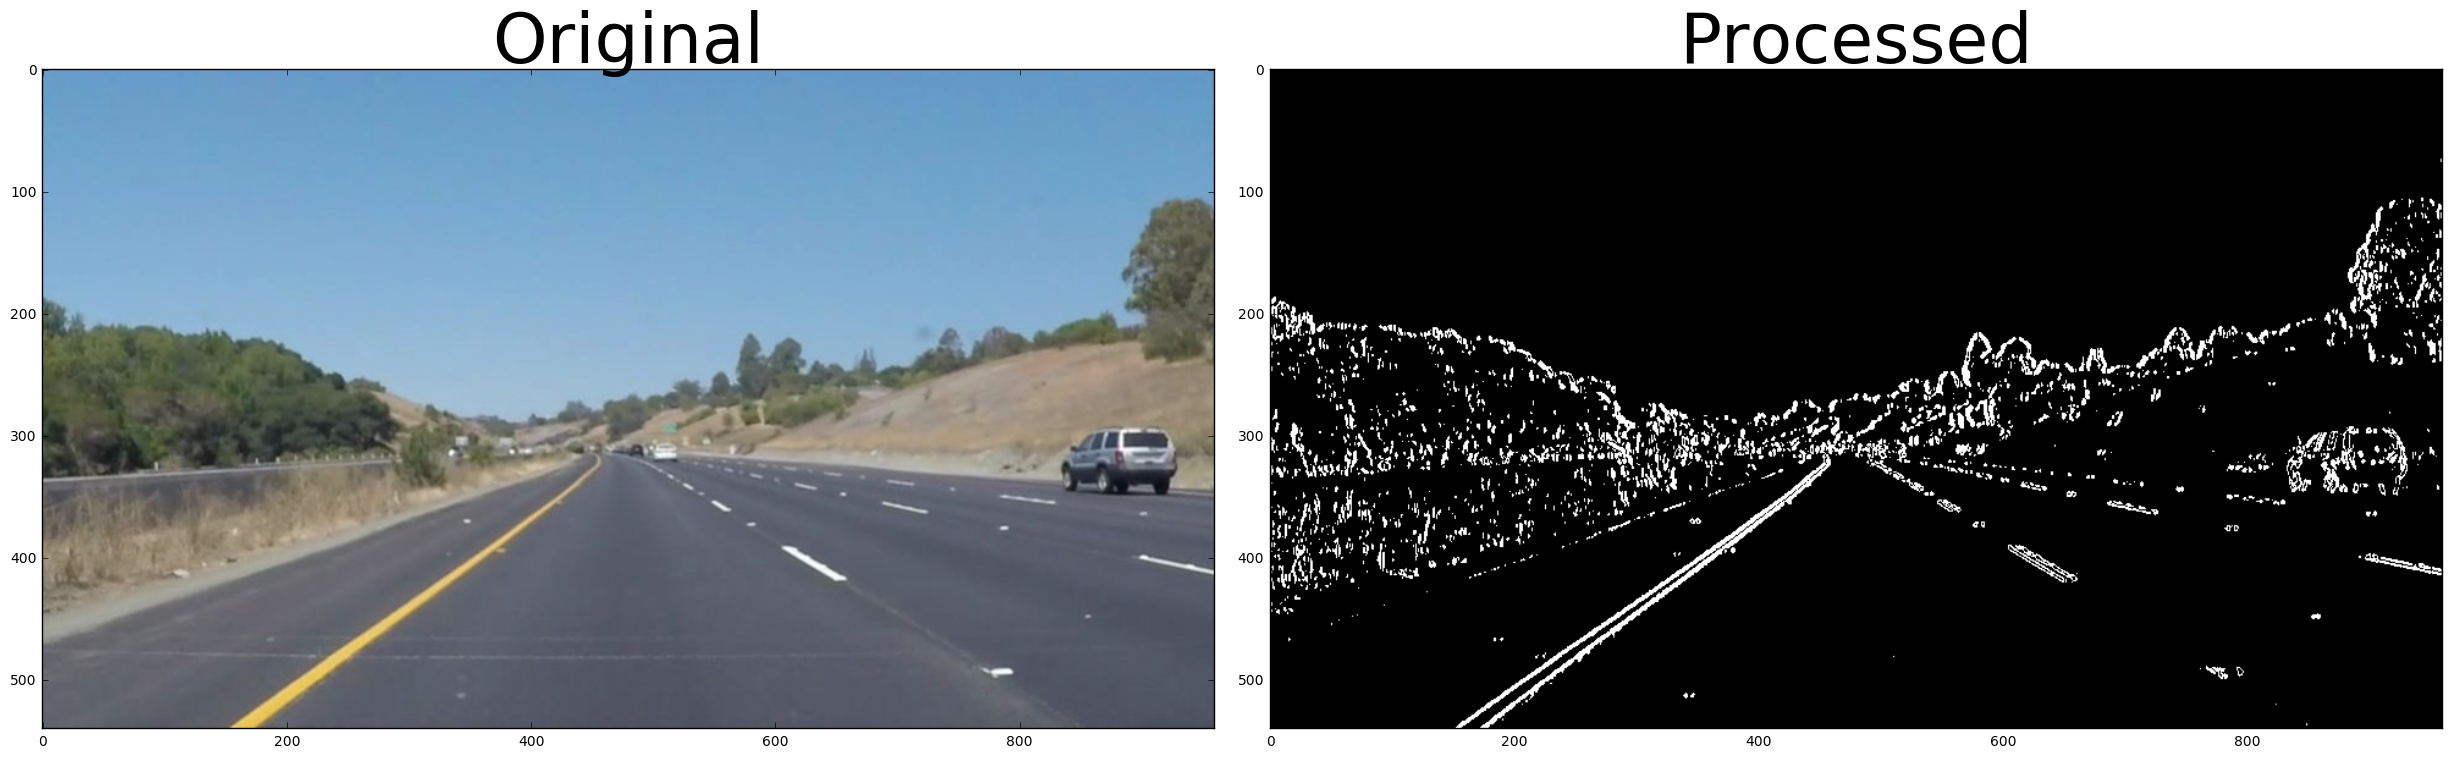

In [116]:
img = plt.imread("./solidYellowCurve.jpg")
sobled = abs_sobel_thresh(img)
display2images(img, sobled, right_gray=True)

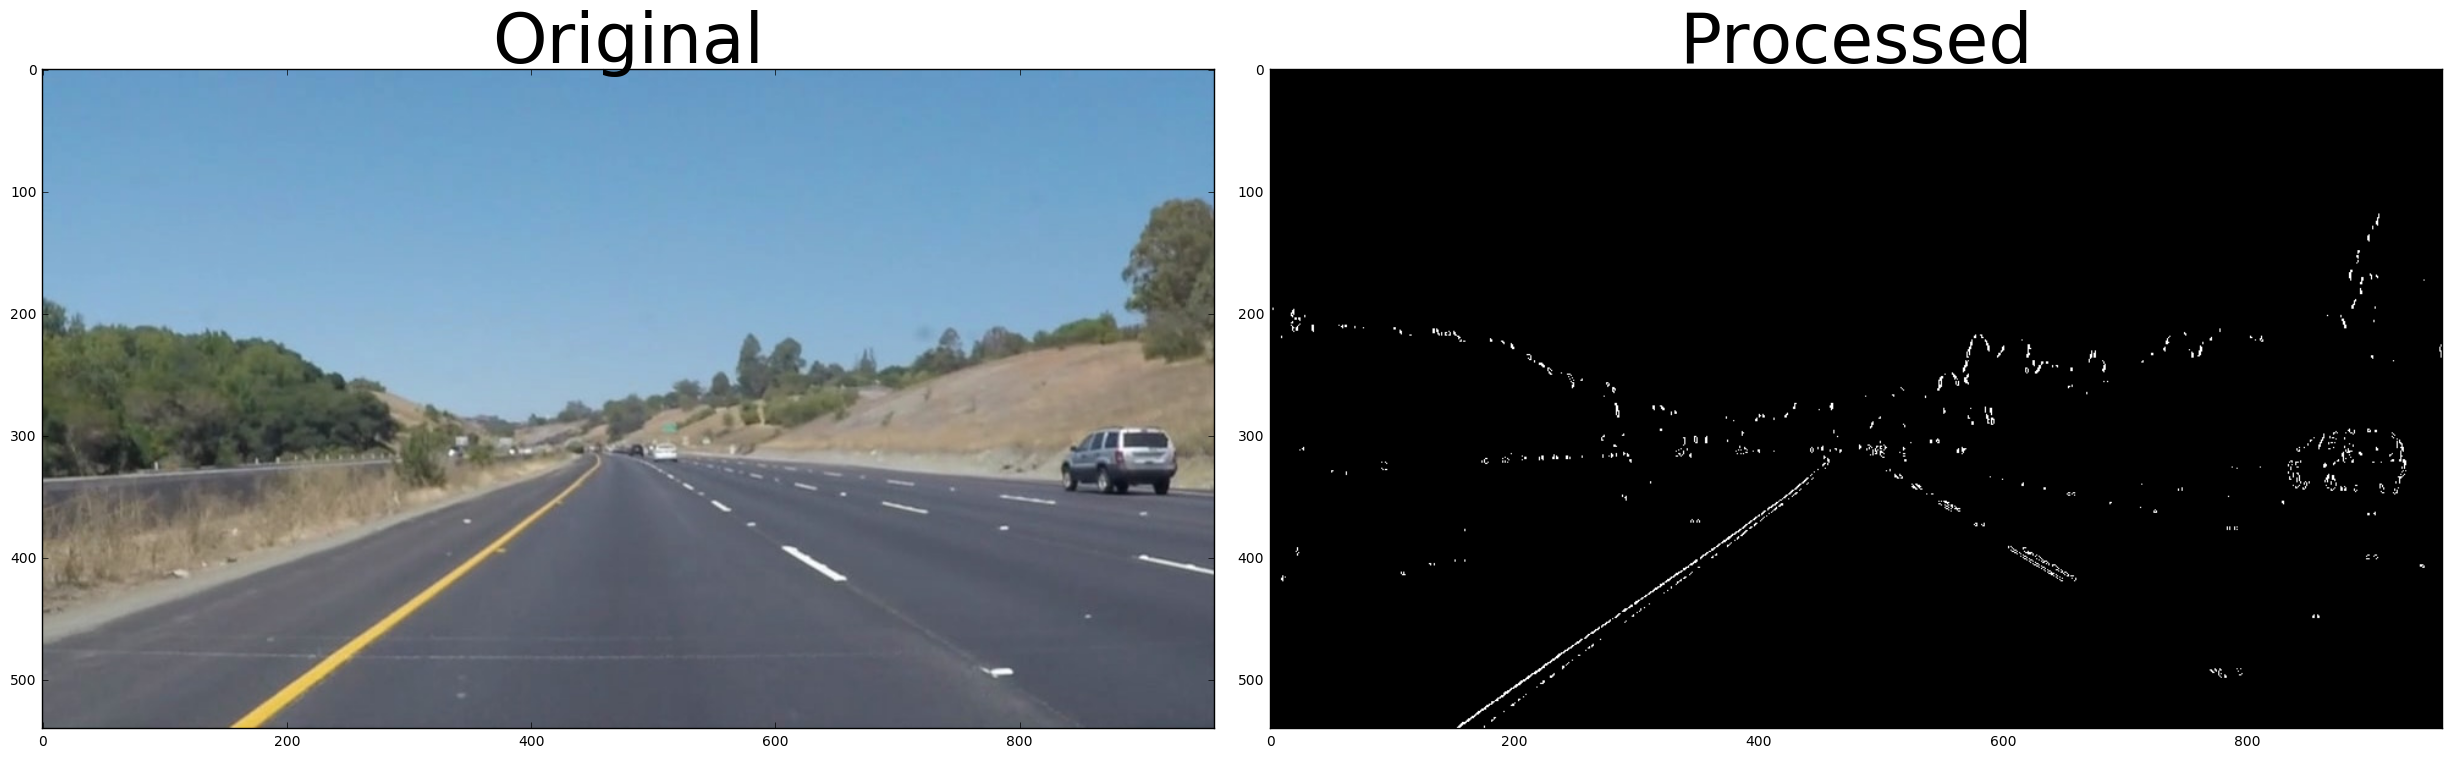

In [117]:
sobled = abs_sobel_thresh(img, thresh_min=60)
display2images(img, sobled, right_gray=True)

### applying sobel